# Keşifsel Analiz

In [ ]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

## Veriyi Al

In [ ]:
from olist.data import Olist
data = Olist().get_data()

Olist e-ticaret platformundaki her işlem şu öğelerle tanımlanır:
- Bir `customer_id` (müşteri)
- Çeşitli `product_id` (ürünler)
- Bir `seller_id` (satıcı)
- Bir `review_id` (yorum)
- Tüm bunlar bir `order_id` (sipariş) ile ilişkilidir

## Çeşitli `DataFrame`'lerinizin kardinalitelerini inceleyin

❓ **Kaç adet benzersiz `orders`, `reviews`, `sellers`, `products` ve `customers` bulunmaktadır?**

In [ ]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **Her sipariş için kaç yorum var? Tüm siparişler için yorum mevcut mu?**
<details>
    <summary markdown='span'>İpuçları</summary>

Bu bilgi tek bir CSV dosyasında doğrudan bulunmaz. Öğrenmek için tabloları birleştirmeniz gerekecek. Hangi tür birleştirme gerektiğini düşünün.

Hangi tabloların gerekli olduğundan emin değilseniz ERD'nize geri dönün.

Yorum sayısını bulmak için: her `order_id` için yorum sayısını sayın ve bir histogram çizin. Bir Pandas serisi üzerinde `.hist()` kullanabilirsiniz.
</details>

In [ ]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]

In [ ]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580


In [ ]:
# Check missing reviews?
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Neredeyse tüm siparişlerin yorumu vardır; 100k sipariş içinde yalnızca 768 tanesinde eksik yorum bulunuyor (yüzde 0.7'den az).

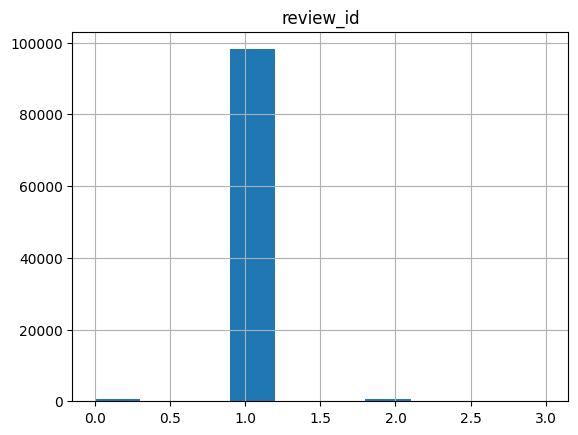

In [ ]:
# We need to add the following magic command to make sure the plot displays correctly!
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ Neredeyse tüm siparişlerde müşteri başına yalnızca bir yorum bulunmaktadır. Bu açıdan sorun yok.

🧪 **Aşağıdaki kodu test edin**

Eksik yorumu olan sipariş sayısını `int` olarak `n_missing_reviews` adlı değişkende saklayın

In [ ]:
n_missing_reviews = orders_reviews.isna().sum()['review_id']

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/jules/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/03-Decision-Science/01-Statistical-Inference/03-Exploratory-Analysis/tests
plugins: dash-3.0.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

